# Project description

*You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

### Step 1. Open the data file and study the general information. 

In [58]:
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as stats
from scipy.stats import f as f_test
import seaborn as sns
import scipy.stats as st
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')

In [21]:
#checking and analysing different dataframes
list_of_dfs = {'Megaline_calls':df_calls,'Megaline_internet':df_internet,'Megaline_messages':df_messages,'Megaline_users':df_users,'Megaline_plans':df_plans}

for key in list_of_dfs:
    print(key)
    print (list_of_dfs[key].head(2))


Megaline_calls
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
Megaline_internet
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
Megaline_messages
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
Megaline_users
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
Megaline_plans
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_mont

In [22]:
#checking and analysing different dataframes
for key in list_of_dfs:
    print(key)
    print (list_of_dfs[key].info())


Megaline_calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
Megaline_internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None
Megaline_messages
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
Megaline_users
<cla

In [4]:
#checking and analysing different dataframes
for key in list_of_dfs:
    print(key)
    print (list_of_dfs[key].isnull().sum())



Megaline_calls
id           0
user_id      0
call_date    0
duration     0
dtype: int64
Megaline_internet
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64
Megaline_messages
id              0
user_id         0
message_date    0
dtype: int64
Megaline_users
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64
Megaline_plans
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


In [5]:
for key in list_of_dfs:
    print(key)
    print (list_of_dfs[key].describe(include = 'all'))



Megaline_calls
              id        user_id   call_date       duration
count     137735  137735.000000      137735  137735.000000
unique    137735            NaN         351            NaN
top     1357_626            NaN  2018-12-27            NaN
freq           1            NaN        1091            NaN
mean         NaN    1247.658046         NaN       6.745927
std          NaN     139.416268         NaN       5.839241
min          NaN    1000.000000         NaN       0.000000
25%          NaN    1128.000000         NaN       1.290000
50%          NaN    1247.000000         NaN       5.980000
75%          NaN    1365.000000         NaN      10.690000
max          NaN    1499.000000         NaN      37.600000
Megaline_internet
              id        user_id session_date        mb_used
count     104825  104825.000000       104825  104825.000000
unique    104825            NaN          351            NaN
top     1214_456            NaN   2018-12-24            NaN
freq           1   

 **Conclusion**

*Looking into details of data it can be seen that there are 5 megalines files for call,internet,messages,user and plan. further when we see the columns of each table it can be pinned out that userids is common column in call,internet,messages and users columns. while analysing null factors , there is missing values in users table churn data column*.

### Step 2. Prepare the data 

<font color='green'><h3>Convert the data to the necessary types</h3></font>

In [23]:
for key in list_of_dfs:
    print(key)
    print (list_of_dfs[key].info())



Megaline_calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
Megaline_internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None
Megaline_messages
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
Megaline_users
<cla

In [25]:
#here we converted the non null object to date time format to use it for further calculations
#converted call_date,session_date,message_date,reg_date,churn_date into datetime format from df_users,df_call,df_internet,df_messagesand df_users dataframe
df_calls["call_date"] = pd.to_datetime(df_calls["call_date"], format='%Y-%m-%d')
df_internet["session_date"] = pd.to_datetime(df_internet["session_date"], format='%Y-%m-%d')
df_messages["message_date"] = pd.to_datetime(df_messages["message_date"], format='%Y-%m-%d')
df_users["reg_date"] = pd.to_datetime(df_users["reg_date"], format='%Y-%m-%d')
df_users["churn_date"] = pd.to_datetime(df_users["churn_date"], format='%Y-%m-%d')
df_calls['duration'] = df_calls['duration'].astype('int')
df_internet['mb_used'] = df_internet['mb_used'].astype('int')

<font color='green'><h3>Find and eliminate errors in the data</h3></font>

In [8]:
df_users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [9]:
df_users['churn_date'].value_counts()

2018-12-18    3
2018-12-31    2
2018-11-14    2
2018-12-19    2
2018-11-16    1
2018-10-03    1
2018-08-16    1
2018-12-15    1
2018-12-12    1
2018-11-11    1
2018-12-26    1
2018-09-07    1
2018-10-22    1
2018-09-18    1
2018-09-01    1
2018-12-10    1
2018-12-27    1
2018-11-30    1
2018-10-13    1
2018-11-24    1
2018-10-07    1
2018-12-22    1
2018-11-21    1
2018-11-18    1
2018-09-17    1
2018-07-31    1
2018-12-30    1
2018-11-29    1
2018-08-19    1
Name: churn_date, dtype: int64

In [26]:
#adding month column the table in df_calls,df_internet and df_messages
df_calls["month"] = df_calls["call_date"].dt.month
df_internet["month"] = df_internet["session_date"].dt.month
df_messages['month'] = df_messages['message_date'].dt.month


In [27]:
#merging the tables of df_calls,df_internet and df_messages tables by using month and user_id column
#agg({'message_date': 'count'})
grouped_calls = df_calls.groupby(["user_id", 'month']).agg({'duration': 'sum', 'call_date': 'count'}).reset_index()
grouped_internet = df_internet.groupby(["user_id", "month"]).agg({'mb_used': 'sum'}).reset_index()
grouped_messages = df_messages.groupby(["user_id", "month"]).agg({'message_date': 'count'}).reset_index()

data_frames = [grouped_calls, grouped_internet, grouped_messages]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'],
                                            how='outer'), data_frames).fillna(0).reset_index()


In [12]:
#print(len(total2))
df_merged.head()


,index,user_id,month,duration,call_date,mb_used,message_date
0,0,1000,12,108.0,16.0,1899.0,11.0
1,1,1001,8,160.0,27.0,6908.0,30.0
2,2,1001,9,278.0,49.0,13294.0,44.0
3,3,1001,10,348.0,65.0,22308.0,53.0
4,4,1001,11,379.0,64.0,18477.0,36.0


In [28]:
#if the value is missing in the churn_date column it means the calling plan was being used when this data was
#retrieved so we will place it with a current date
df_users.loc[df_users["churn_date"].isna(), "churn_date"] = pd.datetime.now().date()
df_users["used_days"] = (df_users["churn_date"]-df_users["reg_date"]).dt.days
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,used_days
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2021-02-24,793
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2021-02-24,926
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2021-02-24,857
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2021-02-24,1123
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2021-02-24,1008


In [32]:
#noting how many calls have duration of 0 ,as there is a lot of data with 32559 rows
df_calls['duration'].value_counts()
df_calls.query('duration == 0.00')

,id,user_id,call_date,duration,month
19,1001_4,1001,2018-12-05,0,12
25,1001_13,1001,2018-12-24,0,12
28,1001_23,1001,2018-10-27,0,10
31,1001_30,1001,2018-10-17,0,10
32,1001_31,1001,2018-11-03,0,11
...,...,...,...,...,...
137720,1499_189,1499,2018-12-27,0,12
137722,1499_191,1499,2018-12-24,0,12
137725,1499_194,1499,2018-10-31,0,10
137727,1499_196,1499,2018-11-22,0,11


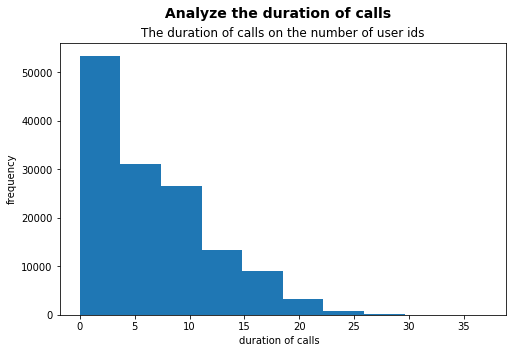

In [43]:
#plotting histograms to see the number of 0's in the graphs 
plt.figure(figsize=(8,5))
df_calls["duration"].plot(kind='hist', title="The duration of calls on the number of user ids")
plt.suptitle(' Analyze the duration of calls',fontsize=14, fontweight='bold') #title
plt.xlabel('duration of calls  ') #x label
plt.ylabel('frequency') #y label
plt.show()
#as there are large number of people with 0's value it can be considered as miss calls,or calls not picked up.As we cannot delete these values it wi
#will lead to large amount of data loss 


Text(0, 0.5, 'Frequency')

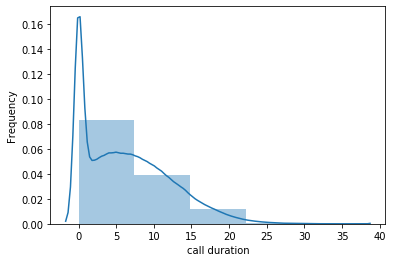

In [39]:
#df_calls['duration'] = df_calls['duration']
sns.distplot(df_calls['duration'], hist=True,bins=5)
plt.xlabel('call duration')
plt.ylabel('Frequency')


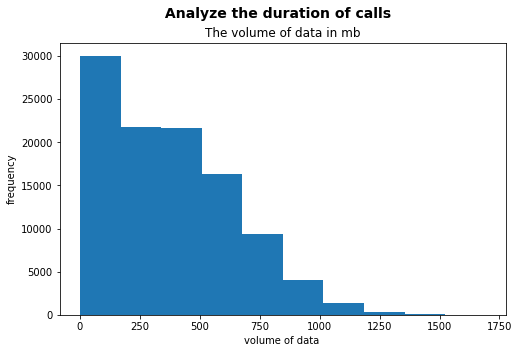

In [57]:
#plotting histograms to see the number of 0's in the graphs 
plt.figure(figsize=(8,5))
df_internet["mb_used"].plot(kind='hist', title="The volume of data in mb")
plt.suptitle(' Analyze the duration of calls',fontsize=14, fontweight='bold') #title
plt.xlabel('volume of data ') #x label
plt.ylabel('frequency') #y label
plt.show()

<font color='green'><h3>The number of calls made and minutes used per month
The number of text messages sent per month
The volume of data per month
The monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)</h3></font>

In [15]:
df_merged.head()

,index,user_id,month,duration,call_date,mb_used,message_date
0,0,1000,12,108.0,16.0,1899.0,11.0
1,1,1001,8,160.0,27.0,6908.0,30.0
2,2,1001,9,278.0,49.0,13294.0,44.0
3,3,1001,10,348.0,65.0,22308.0,53.0
4,4,1001,11,379.0,64.0,18477.0,36.0


In [44]:
months = 12

In [45]:
#The number of calls made and minutes used per month The number of text messages sent per month The volume of data per month 
df_merged['duration_per_month'] = df_merged['duration'] / months
df_merged['calls_month'] = df_merged['call_date'] / months
df_merged['internet_mb_per_month'] = df_merged['mb_used'] / months
df_merged['msg_per_month'] = df_merged['message_date'] / months

In [18]:
df_merged

,index,user_id,month,duration,call_date,mb_used,message_date,duration_per_month,calls_month,internet_mb_per_month,msg_per_month
0,0,1000,12,108.0,16.0,1899.0,11.0,9.000000,1.333333,158.250000,0.916667
1,1,1001,8,160.0,27.0,6908.0,30.0,13.333333,2.250000,575.666667,2.500000
2,2,1001,9,278.0,49.0,13294.0,44.0,23.166667,4.083333,1107.833333,3.666667
3,3,1001,10,348.0,65.0,22308.0,53.0,29.000000,5.416667,1859.000000,4.416667
4,4,1001,11,379.0,64.0,18477.0,36.0,31.583333,5.333333,1539.750000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...
2288,2288,1349,10,0.0,0.0,13079.0,76.0,0.000000,0.000000,1089.916667,6.333333
2289,2289,1349,11,0.0,0.0,17113.0,72.0,0.000000,0.000000,1426.083333,6.000000
2290,2290,1349,12,0.0,0.0,13027.0,61.0,0.000000,0.000000,1085.583333,5.083333
2291,2291,1361,5,0.0,0.0,1516.0,2.0,0.000000,0.000000,126.333333,0.166667


In [46]:
#rounding of the value in duration column by using ceil function
df_merged['duration_ceil'] = df_merged['duration'].apply(np.ceil)

In [47]:
#rounding of the values in gb_used by ceil
df_merged['gb_used'] = (df_merged['mb_used'] /1024).apply(np.ceil)
#df_merged['gb_used'].reset_index()


In [21]:
df_merged['gb_used'].head().reset_index()

,index,gb_used
0,0,2.0
1,1,7.0
2,2,13.0
3,3,22.0
4,4,19.0


In [22]:
df_users.columns,df_plans.columns


(Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
        'churn_date', 'used_days'],
       dtype='object'),
 Index(['messages_included', 'mb_per_month_included', 'minutes_included',
        'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
        'plan_name'],
       dtype='object'))

In [48]:
#grouped_plan = df_users.groupby(["user_id"]).agg('sum')
#grouped_plan
#df_megamerged = (df_merged
  #.join(df_users.groupby('user_id')['plan'].sum(), on='user_id'))
#here we megamerged the table with merging tables from df_users and df_merged
df_megamerged = df_merged.merge(df_users[['user_id','plan','city']],how='left',on='user_id').fillna(0)
df_megamerged.reset_index()
  
            # right = grouped_plan, how='outer',on=['user_id']).fillna(0)
df_megamerged

,index,user_id,month,duration,call_date,mb_used,message_date,duration_per_month,calls_month,internet_mb_per_month,msg_per_month,duration_ceil,gb_used,plan,city
0,0,1000,12,108.0,16.0,1899.0,11.0,9.000000,1.333333,158.250000,0.916667,108.0,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1,1001,8,160.0,27.0,6908.0,30.0,13.333333,2.250000,575.666667,2.500000,160.0,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,2,1001,9,278.0,49.0,13294.0,44.0,23.166667,4.083333,1107.833333,3.666667,278.0,13.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,3,1001,10,348.0,65.0,22308.0,53.0,29.000000,5.416667,1859.000000,4.416667,348.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,4,1001,11,379.0,64.0,18477.0,36.0,31.583333,5.333333,1539.750000,3.000000,379.0,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,2288,1349,10,0.0,0.0,13079.0,76.0,0.000000,0.000000,1089.916667,6.333333,0.0,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA"
2289,2289,1349,11,0.0,0.0,17113.0,72.0,0.000000,0.000000,1426.083333,6.000000,0.0,17.0,surf,"Boston-Cambridge-Newton, MA-NH MSA"
2290,2290,1349,12,0.0,0.0,13027.0,61.0,0.000000,0.000000,1085.583333,5.083333,0.0,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA"
2291,2291,1361,5,0.0,0.0,1516.0,2.0,0.000000,0.000000,126.333333,0.166667,0.0,2.0,surf,"Birmingham-Hoover, AL MSA"


<font color='green'><h3>
The monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)</h3></font>

In [49]:
#calculated the total cost of each user
def total_revenue(row):
    plan = row['plan']   
    
    internet_usage = row['gb_used']
    monthly_minutes  = row['duration_ceil']
    messages = row['msg_per_month']
    
    
    if plan == 'surf':
        
        if monthly_minutes >= 500:
            revenue_calls = (0.03)*(monthly_minutes - 500) 
        else:
             revenue_calls = 0
        if messages >= 50:
            revenue_messages = 0.03*(messages - 50)
        else :
            revenue_messages = 0
        if internet_usage >= 15:
            revenue_internet_usage = 10*(internet_usage - 15)
        else :
            revenue_internet_usage = 0
                
        cost = 20 + revenue_messages + revenue_internet_usage + revenue_calls
            
        
        
    elif plan == 'ultimate':
        
        if monthly_minutes >= 3000:
            revenue_calls = (0.01)*(monthly_minutes - 3000) 
        else:
            revenue_calls = 0
        if messages >= 50:
            revenue_messages = 0.01*(messages - 1000)
        else :
            revenue_messages = 0
        if internet_usage >= 15:
            revenue_internet_usage = 7*(internet_usage - 30)
        else :
            revenue_internet_usage = 0
        cost = 70 + revenue_messages + revenue_internet_usage + revenue_calls
        
    return cost

In [50]:
df_megamerged['total_cost'] = df_megamerged.apply(total_revenue , axis = 1)
#df_megamerged['total_cost'] = df_megamerged.apply(total_revenue_ultimate , axis = 1)
df_megamerged.head().reset_index()

,level_0,index,user_id,month,duration,call_date,mb_used,message_date,duration_per_month,calls_month,internet_mb_per_month,msg_per_month,duration_ceil,gb_used,plan,city,total_cost
0,0,0,1000,12,108.0,16.0,1899.0,11.0,9.000000,1.333333,158.250000,0.916667,108.0,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70.0
1,1,1,1001,8,160.0,27.0,6908.0,30.0,13.333333,2.250000,575.666667,2.500000,160.0,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.0
2,2,2,1001,9,278.0,49.0,13294.0,44.0,23.166667,4.083333,1107.833333,3.666667,278.0,13.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.0
3,3,3,1001,10,348.0,65.0,22308.0,53.0,29.000000,5.416667,1859.000000,4.416667,348.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",90.0
4,4,4,1001,11,379.0,64.0,18477.0,36.0,31.583333,5.333333,1539.750000,3.000000,379.0,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",60.0


**CONCLUSION**

First of all we converted the datatypes to be used for further calculations we converted the non null object to date time format to use it for further calculations,call_date,session_date,message_date,reg_date,churn_date into datetime format from df_users,df_call,df_internet,df_message.Then we did the merging the tables of df_calls,df_internet and df_messages by using month and user_id column.then we found out some more values for adding to table, the number of calls made and minutes used per month The number of text messages sent per month The volume of data per month .then rounded the values in duration and gb used by ceil function.then we added one more dataframe df_users to get the plan column for furthur calculation of total cost on the by subtracting the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan.it can be seen that there is some negative values in total cost column

### Step 3. Analyze the data

<font color='green'><h3>
Describe the customers' behavior. Find the minutes, texts, and volume of data the users of each plan require per month. Calculate the mean, dispersion, and standard deviation. Plot histograms. Describe the distributions.</h3></font>

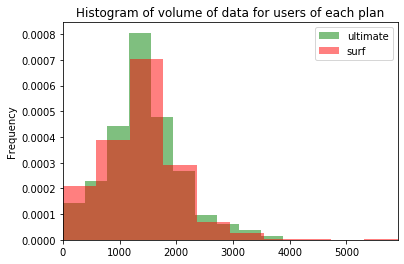

In [26]:

x1 = df_megamerged.loc[df_megamerged.plan=='ultimate', 'internet_mb_per_month']
x2 = df_megamerged.loc[df_megamerged.plan=='surf', 'internet_mb_per_month']

kwargs = dict(alpha=0.5, bins=10,density=True)

plt.hist(x1, **kwargs, color='g', label='ultimate')
plt.hist(x2, **kwargs, color='r', label='surf')

plt.gca().set(title='Histogram of volume of data for users of each plan', ylabel='Frequency')
plt.xlim(0,5905)
plt.legend();


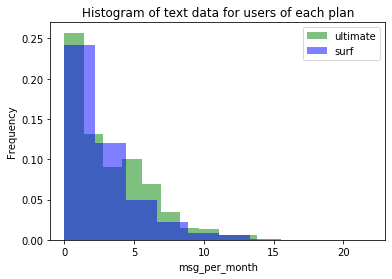

In [27]:
x1 = df_megamerged.loc[df_megamerged.plan=='ultimate', 'msg_per_month']
x2 = df_megamerged.loc[df_megamerged.plan=='surf', 'msg_per_month']

kwargs = dict(alpha=0.5, bins = 10,density=True)

plt.hist(x1, **kwargs, color='g', label='ultimate')
plt.hist(x2, **kwargs, color='b', label='surf')

plt.gca().set(title='Histogram of text data for users of each plan', ylabel='Frequency',xlabel='msg_per_month')
plt.xlim(-1,23)
plt.legend();


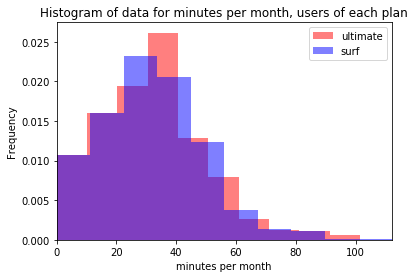

In [28]:
x1 = df_megamerged.loc[df_megamerged.plan=='ultimate', 'duration_per_month']
x2 = df_megamerged.loc[df_megamerged.plan=='surf', 'duration_per_month']

kwargs = dict(alpha=0.5, bins=10,density=True)

plt.hist(x1, **kwargs, color='r', label='ultimate')
plt.hist(x2, **kwargs, color='b', label='surf')

plt.gca().set(title='Histogram of data for minutes per month, users of each plan', ylabel='Frequency',xlabel='minutes per month')
plt.xlim(0,112)
plt.legend();

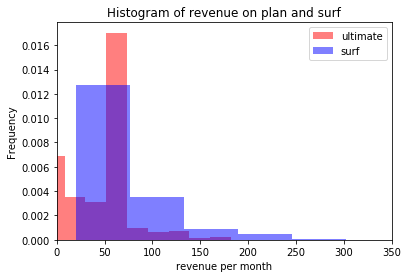

In [56]:
x1 = df_megamerged.loc[df_megamerged.plan=='ultimate', 'total_cost']
x2 = df_megamerged.loc[df_megamerged.plan=='surf', 'total_cost']

kwargs = dict(alpha=0.5, bins=10,density=True)

plt.hist(x1, **kwargs, color='r', label='ultimate')
plt.hist(x2, **kwargs, color='b', label='surf')

plt.gca().set(title='Histogram of revenue on plan and surf', ylabel='Frequency',xlabel='revenue per month')
plt.xlim(0,350)
plt.legend();

In [53]:
df_megamerged['total_cost'].max()

584.7

In [29]:
#calculating mean and variance of plan surf groupby userid
df_surf = df_megamerged.query('plan == "surf"').groupby(['user_id'])['msg_per_month','internet_mb_per_month','duration_per_month'].mean()
variance_surf = np.var(df_surf)
print(variance_surf)

msg_per_month                 6.661204
internet_mb_per_month    267857.242750
duration_per_month          218.772339
dtype: float64


In [30]:
#calculating mean and variance of ultimate surf groupby userid
f_surf = df_megamerged.query('plan == "ultimate"').groupby(['user_id'])['msg_per_month','internet_mb_per_month','duration_per_month'].mean()
variance_surf = np.var(df_surf)
print(variance_surf)

msg_per_month                 6.661204
internet_mb_per_month    267857.242750
duration_per_month          218.772339
dtype: float64


*Here we calculated the customers behavior;find out the minutes, texts, and volume of data the users of each plan require per month. Calculated the mean, dispersion, and standard deviation.from the figures it can be seen that ultimate shows the highest number of values for 1500 mb .and while looking into other figures minutes used is highest 40 for ultimate and (20 to 35) for surf.message per month is more on the range for,the peak is high nearby to 0 for both ultimate and surf.

### Step 4. Test the hypotheses

*The average revenue from users of Ultimate and Surf calling plans differs.
The average revenue from users in NY-NJ area is different from that of the users from other regions.*

In [61]:
ultimate_test = df_megamerged[df_megamerged.plan=='ultimate']['total_cost']
surf_test = df_megamerged[df_megamerged.plan=='surf']['total_cost']

In [32]:
surf_test

1        20.0
2        20.0
3        90.0
4        60.0
5        60.0
        ...  
2283    180.0
2288     20.0
2289     40.0
2290     20.0
2291     20.0
Name: total_cost, Length: 1573, dtype: float64

In [33]:
def check_f_test(X,Y):
  F = np.var(X) / np.var(Y)
  p_value = f_test.cdf(F, len(X)-1, len(Y)-1)
  return p_value > .05

In [34]:
if check_f_test(ultimate_test, surf_test):
    print('could not reject the null hypothesis, therefore that Var(ultimate) == Var(surf)')
else:
    print('There is significance to reject the null hypothesis, therefore Var(ultimate) != Var(surf)')

There is significance to reject the null hypothesis, therefore Var(ultimate) != Var(surf)


In [62]:
#levene test
st.levene(ultimate_test, surf_test, center='mean')
 #the p-value of the test is less than the threshold value of 0.05 and hence, the sample groups do not have equal variance.

LeveneResult(statistic=0.2438235714768432, pvalue=0.6215054013011277)

In [35]:
results = stats.ttest_ind(ultimate_test, surf_test, equal_var=True)
if results.pvalue < .05:
      print(' rejecting the null hypothesis, therefore the avg profits comparing for plan is different')
        
else:
      print('Fail in rejecting of the null hypothesis, therefore the avg profits comparing for the plan is same')

 rejecting the null hypothesis, therefore the avg profits comparing for plan is different


In [36]:
df_users['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [37]:
df_megamerged["is_NY"] = df_megamerged["city"].str.contains("NY-NJ")

In [38]:
NY = df_megamerged[df_megamerged["is_NY"]]['total_cost'].dropna()
not_NY = df_megamerged[~df_megamerged["is_NY"]]['total_cost'].dropna()


In [39]:
if check_f_test(NY, not_NY):
    print('There is significance to reject the null hypothesis, therefore Var(ultimate) == Var(surf)')   
else:
    print('Failed to reject the null hypothesis, therefore Var(ultimate) != Var(surf)')

Failed to reject the null hypothesis, therefore Var(ultimate) != Var(surf)


In [40]:
results = stats.ttest_ind(NY, not_NY, equal_var=True)
if results.pvalue < .05:
      print('we have sufficient significance for rejecting the null hypothesis, therefore the avg profits comparing for two population in NY area is different')
        
else:
      print('Fail in rejecting of the null hypothesis, therefore the avg profits comparing for two population in NY area is same')

Fail in rejecting of the null hypothesis, therefore the avg profits comparing for two population in NY area is same


**CONCLUSION**

*In this step we did the hypothesis testing  for ultimate and surf plan on the basis of total cost then we did testing of the NY-NJ region .
1. In the first case for ultimate and surf plan it can be seen that it is failed to reject the null hypothesis when we take the significance level to .05 it show the average profit to be different
2. In the second case for NY-NJ region it is showing the average profit to be same on while rejecting the null hypothesis

### Step 5 Conclusion

**This project involve analysing the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.we are going to carry out a preliminary analysis of the plans based on a relatively small client selection. we will  have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018.**
*The data contains five different datasets megaline_calls,megaline_internet,megaline_messages,megaline_plans and megaline_users* 
* Description of data
*Surf
Monthly charge: $20
500 monthly minutes, 50 texts, and 15 GB of data
After exceeding the package limits:
1 minute: 3 cents
1 text message: 3 cents
1 GB of data: $10
Ultimate
Monthly charge: $70
3000 monthly minutes, 1000 text messages, and 30 GB of data
After exceeding the package limits:
1 minute: 1 cent
1 text message: 1 cent
1 GB of data: $7*
* *First looking into details of data it can be seen that there are 5 megalines files for call,internet,messages,user and plan. further when we see the columns of each table it can be pinned out that userids is common column in call,internet,messages and users columns. while analysing null factors , there is missing values in users table churn data column.*
* Secondly  we converted the datatypes to be used for further calculations we converted the non null object to date time format to use it for further calculations,call_date,session_date,message_date,reg_date,churn_date into datetime format from df_users,df_call,df_internet,df_message.Then we did the merging the tables of df_calls,df_internet and df_messages by using month and user_id column.then we found out some more values for adding to table, the number of calls made and minutes used per month The number of text messages sent per month The volume of data per month .then rounded the values in duration and gb used by ceil function.then we added one more dataframe df_users to get the plan column for furthur calculation of total cost on the by subtracting the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan.it can be seen that there is some negative values in total cost column
* Thirdly we calculated the customers behavior;find out the minutes, texts, and volume of data the users of each plan require per month. Calculated the mean, dispersion, and standard deviation.from the figures it can be seen that ultimate shows the highest number of values for 1500 mb .and while looking into other figures minutes used is highest 40 for ultimate and (20 to 35) for surf.message per month is more on the range for,the peak is high nearby to 0 for both ultimate and surf.
* Fourtly we find out while the average revenue from users of Ultimate and Surf calling plans differs and the average revenue from users in NY-NJ area is different from that of the users from other regions.*
**Hence it can be concluded while carrying out different calculations that there is multiple relationships between different columns and **
1. it can be seen that ultimate shows the highest number of values for 1500 mb .and while looking into other figures minutes used is highest 40 for ultimate and (20 to 35) for surf.message per month is more on the range for,the peak is high nearby to 0 for both ultimate and surf.
2. when we calculated the variance of plan the figure shows ( msg_per_month=6.661204),(internet_mb_per_month=267857.242750)
duration_per_month= 218.772339.for ultimate the variance values are for (msg_per_month=7.481248)(internet_mb_per_month  =240646.527407 and (duration_per_month=219.623756)
3.In the case for ultimate and surf plan it can be seen that it is failed to reject the null hypothesis when we take the significance level to .05 it show the average profit to be different and In the second case for NY-NJ region it is showing the average profit to be same on while rejecting the null hypothesis